[Capstone Instructions](1687275588_Capstone_Two_Step_3__EDA.pdf)

# 0. Table of content:

[1. Load data:](#1.-Load-data:)  
[2. Build data profiles and tables:](#2.-Build-data-profiles-and-tables:)  
    - [2.1. Review of the Data Wrangling phase:](#2.1.-Review-of-the-Data-Wrangling-phase:)  
    - [2.2. Inferential statistics:](#2.2.-Inferential-statistics:)  
[3. Explore data relationships:](#3.-Explore-data-relationships:)  
    - [3.1. Multicolinearity among features:](#3.1.-Multicolinearity-among-features:)  
    - [3.2. Features data distribution:](#3.2.-Features-data-distribution:)  
[4. Feature selection and engineering:](#4.-Feature-selection-and-engineering:)  
    - [4.1. One-hot encoding of ctegorical features:](#4.1.-One-hot-encoding-of-ctegorical-features:)  
[5. Save data:](#5.-Save-data:)  

# 1. Load data:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import skew, kurtosis
from IPython.display import IFrame

In [6]:
IFrame(r"..\references\03_eda\1687275588_Capstone_Two_Step_3__EDA.pdf", width=1000, height=600)

In [7]:
file = r"..\data\raw\sf_df_eda.csv"
sf = pd.read_csv(file)

In [8]:
sf.head(5)

,Permit Number,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,...,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Estimated Cost Range,Existing Stories Range,Proposed Stories Range,Existing Units Range,Proposed Units Range
0,201505065519,4,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,...,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,<10k,4–6,4–6,51–200,11–50
1,201604195146,4,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,...,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,<10k,7–10,4–6,11–50,11–50
2,201611072166,8,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,...,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,<10k,2–3 stories,2–3 stories,0,0
3,201611283529,6,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,...,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,10k–100k,2–3 stories,4–6,11–50,11–50
4,201706149344,8,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,...,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855,<10k,4–6,4–6,200+,200+


In [9]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179623 entries, 0 to 179622
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Permit Number                        179623 non-null  object 
 1   Permit Type                          179623 non-null  int64  
 2   Permit Creation Date                 179623 non-null  object 
 3   Block                                179623 non-null  object 
 4   Lot                                  179623 non-null  object 
 5   Street Number                        179623 non-null  int64  
 6   Street Name                          179623 non-null  object 
 7   Street Suffix                        179623 non-null  object 
 8   Description                          179623 non-null  object 
 9   Current Status                       179623 non-null  object 
 10  Current Status Date                  179623 non-null  object 
 11  Filed Date   

# 2. Build data profiles and tables:

## 2.1. Review of the Data Wrangling phase:

After the data wrangling phase, there are a few points ot tackle before any inferential statistics:  
    - Categories (text, numerical).  
    - Outliers present.  
    - Range to revise aligned on the reviewed data. Redo or delete them if necessary.  
    - Partial duplicates. Discuss their impact on the permit type.  

### 2.1.1. Categories:

In [14]:
cols= list(sf.columns)
cols

['Permit Number',
 'Permit Type',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Number',
 'Street Name',
 'Street Suffix',
 'Description',
 'Current Status',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'First Construction Document Date',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Permit Expiration Date',
 'Estimated Cost',
 'Revised Cost',
 'Existing Use',
 'Existing Units',
 'Proposed Use',
 'Proposed Units',
 'Plansets',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Supervisor District',
 'Neighborhoods - Analysis Boundaries',
 'Zipcode',
 'Location',
 'Record ID',
 'Estimated Cost Range',
 'Existing Stories Range',
 'Proposed Stories Range',
 'Existing Units Range',
 'Proposed Units Range']

Some variables should represent categories and therefore they should be of integer data type and not float.

In [16]:
float_to_integer = [
    'Number of Existing Stories',
    'Number of Proposed Stories',
    'Existing Units',
    'Proposed Units',
    'Plansets',
    'Existing Construction Type',
    'Proposed Construction Type',
    'Supervisor District',
    'Zipcode']
float_to_integer

['Number of Existing Stories',
 'Number of Proposed Stories',
 'Existing Units',
 'Proposed Units',
 'Plansets',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Supervisor District',
 'Zipcode']

In [17]:
float_to_integer_df = sf[float_to_integer]
float_to_integer_df.head(5)

,Number of Existing Stories,Number of Proposed Stories,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
0,6.0,5.670006,143.000000,16.323936,2.0,3.0,5.0,3.0,94102.0
1,7.0,5.670006,15.494931,16.323936,2.0,3.0,5.0,3.0,94102.0
2,2.0,2.000000,1.000000,1.000000,2.0,5.0,5.0,3.0,94109.0
3,3.0,5.670006,15.494931,16.323936,2.0,3.0,5.0,6.0,94102.0
4,5.0,5.000000,326.000000,326.000000,2.0,1.0,1.0,10.0,94107.0


In [18]:
# Dictionary to store results
non_integer_stats = {}

# Loop through each column in the float-only DataFrame
for col in float_to_integer_df.columns:
    total = float_to_integer_df[col].notnull().sum()
    non_integer_count = (float_to_integer_df[col] % 1 != 0).sum()
    proportion = non_integer_count / total if total > 0 else 0
    non_integer_stats[col] = {
        "non_integer_count": non_integer_count,
        "total": total,
        "proportion": round(proportion, 4)
    }

# Convert the results into a DataFrame
result_df = pd.DataFrame(non_integer_stats).T.sort_values(by="proportion", ascending=False)

# Display the result
print(result_df)

                            non_integer_count     total  proportion
Existing Units                        47129.0  179623.0      0.2624
Proposed Units                        46610.0  179623.0      0.2595
Number of Existing Stories            39566.0  179623.0      0.2203
Number of Proposed Stories            39578.0  179623.0      0.2203
Plansets                                  0.0  179623.0      0.0000
Existing Construction Type                0.0  179623.0      0.0000
Proposed Construction Type                0.0  179623.0      0.0000
Supervisor District                       0.0  179623.0      0.0000
Zipcode                                   0.0  179623.0      0.0000


In [19]:
cols_to_fix1 = [
    'Number of Existing Stories',
    'Number of Proposed Stories',
    'Existing Units',
    'Proposed Units']

In [20]:
sf[cols_to_fix1] = sf[cols_to_fix1].round(0).astype('Int64')

In [21]:
cols_to_fix2 = [
    'Plansets',
    'Existing Construction Type',
    'Proposed Construction Type',
    'Supervisor District',
    'Zipcode']

In [22]:
sf[cols_to_fix2] = sf[cols_to_fix2].astype('Int64')

In [23]:
float_to_integer_df = sf[float_to_integer]
float_to_integer_df.head(5)

,Number of Existing Stories,Number of Proposed Stories,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
0,6,6,143,16,2,3,5,3,94102
1,7,6,15,16,2,3,5,3,94102
2,2,2,1,1,2,5,5,3,94109
3,3,6,15,16,2,3,5,6,94102
4,5,5,326,326,2,1,1,10,94107


Aligned to these corrections we will need to re-do the "range" columns.  
However, we first need to address the outliers identified in the Data Wrangling phase.  

### 2.1.2. Outliers:

As a reminder:

In [27]:
Variables_with_outliers = [
    'Number of Existing Stories',
    'Number of Proposed Stories',
    'Estimated Cost',
    'Revised Cost',
    'Existing Units',
    'Proposed Units']

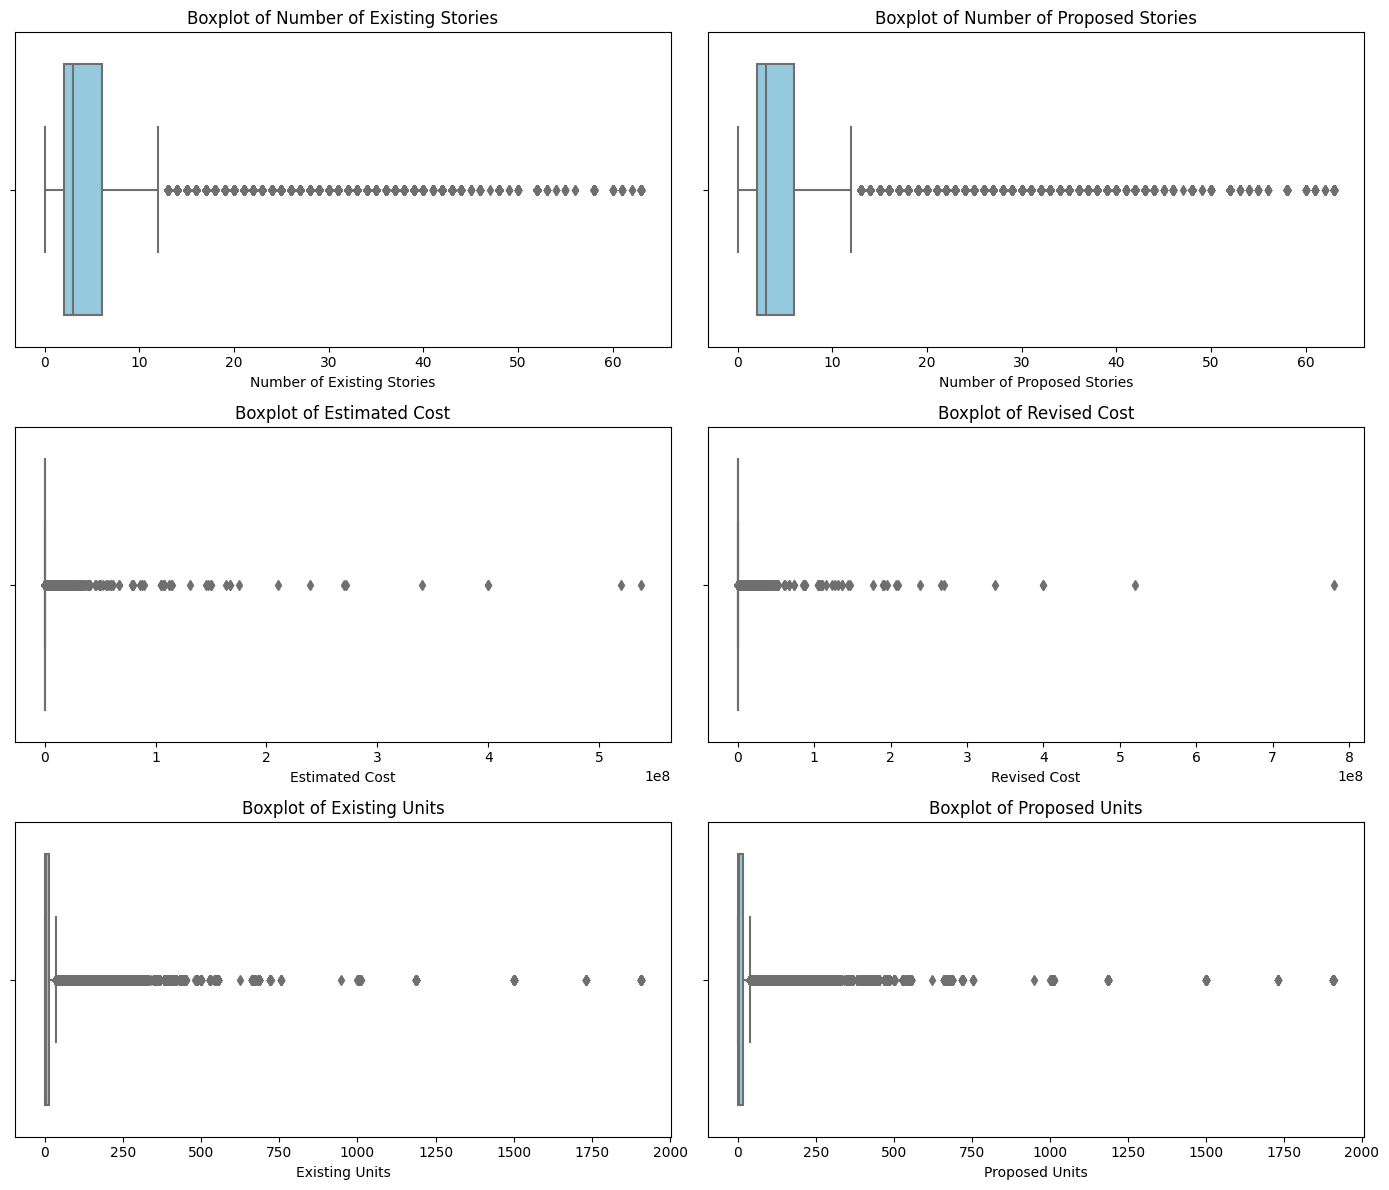

In [28]:
# Create subplots: 3 rows x 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
#Flatten the axes 2D Numpy array to prepare below iteration:
axes = axes.flatten()  

# Loop through each numerical column and corresponding subplot
for i, col in enumerate(Variables_with_outliers):
    sns.boxplot(data=sf, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

One possible strategy can be to divide the dataset between two datasets: low-rise buildings and high-rise buildings.  
This could make plausible sense as in construction or urban planning analysis, low-rise and high-rise buildings often behave differently across costs, timelines, permitting, and project types.  

In [30]:
stories = sf["Number of Existing Stories"]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = stories.quantile(0.25)
Q3 = stories.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Calculate upper bound
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for 'Number of Existing Stories': {upper_bound.round(0)}")

Upper bound for 'Number of Existing Stories': 12.0


In [31]:
# Split into two datasets based on the number of existing stories
sf_low_rise = sf[
    (sf["Number of Existing Stories"] <= 12) &
    (sf["Number of Proposed Stories"] <= 12)
]
sf_high_rise = sf[
    (sf["Number of Existing Stories"] > 12) |
    (sf["Number of Proposed Stories"] > 12)
]

In [32]:
print(sf_low_rise.shape, sf_high_rise.shape)

(164689, 36) (14934, 36)


**For 'Estimated Cost', 'Revised Cost','Existing Units','Proposed Units', np.log1p() will be used to the skewness due to the outliers.** 
**Indeed, outliers might be common for cost variables.**  

C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

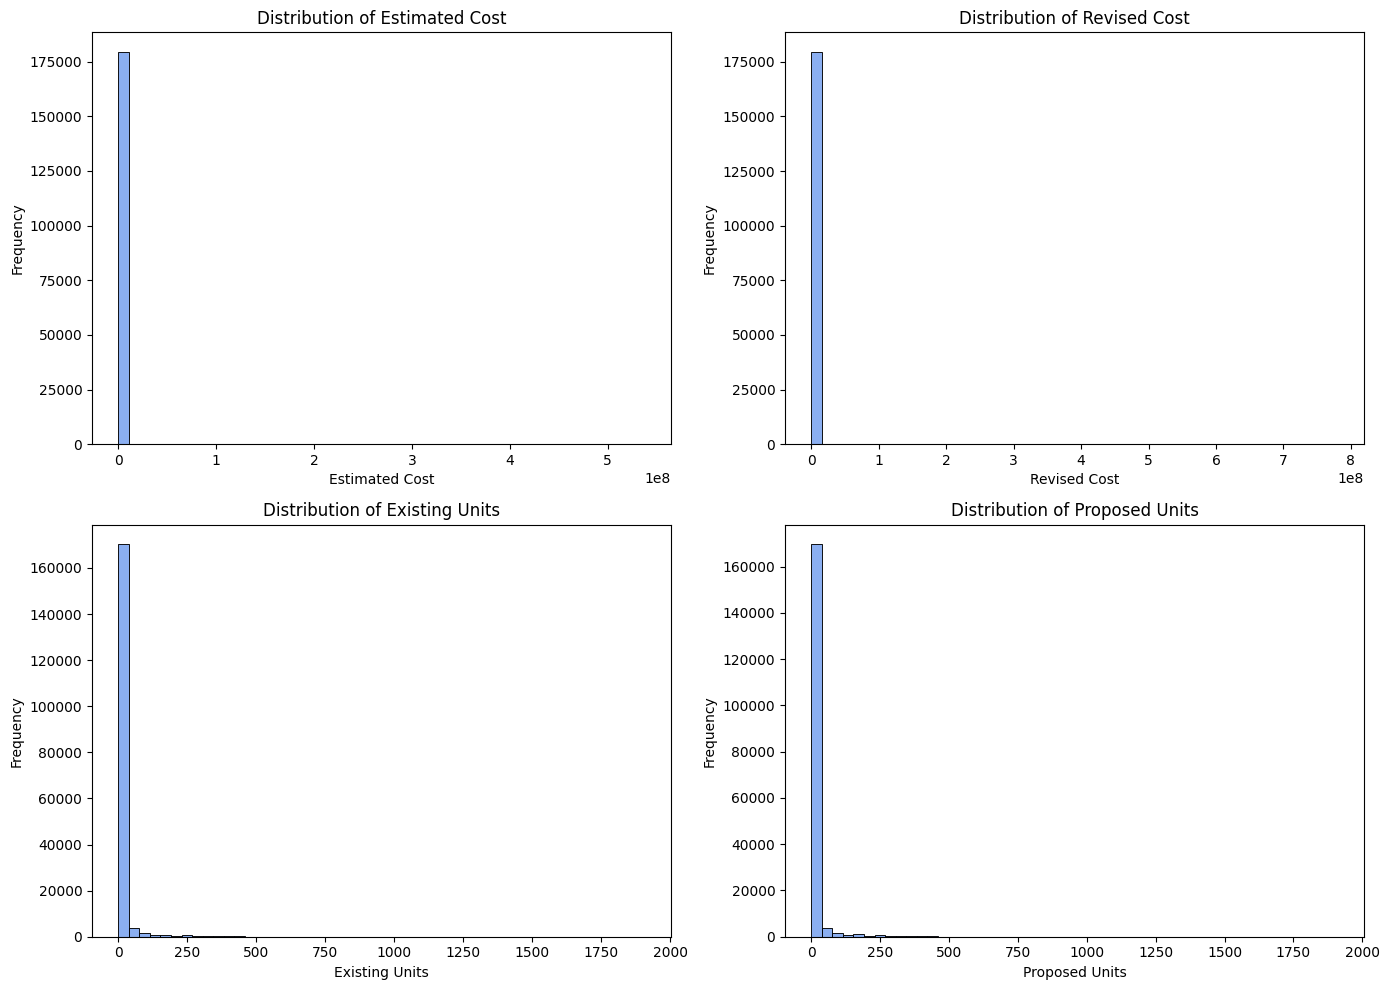

In [34]:
columns = ['Estimated Cost', 'Revised Cost', 'Existing Units', 'Proposed Units']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    # Remove non-numeric and NaN values
    clean_data = pd.to_numeric(sf[col], errors='coerce').dropna()
    
    # Plot histogram without KDE
    sns.histplot(clean_data, bins=50, kde=False, ax=axes[i], color='cornflowerblue')
    
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

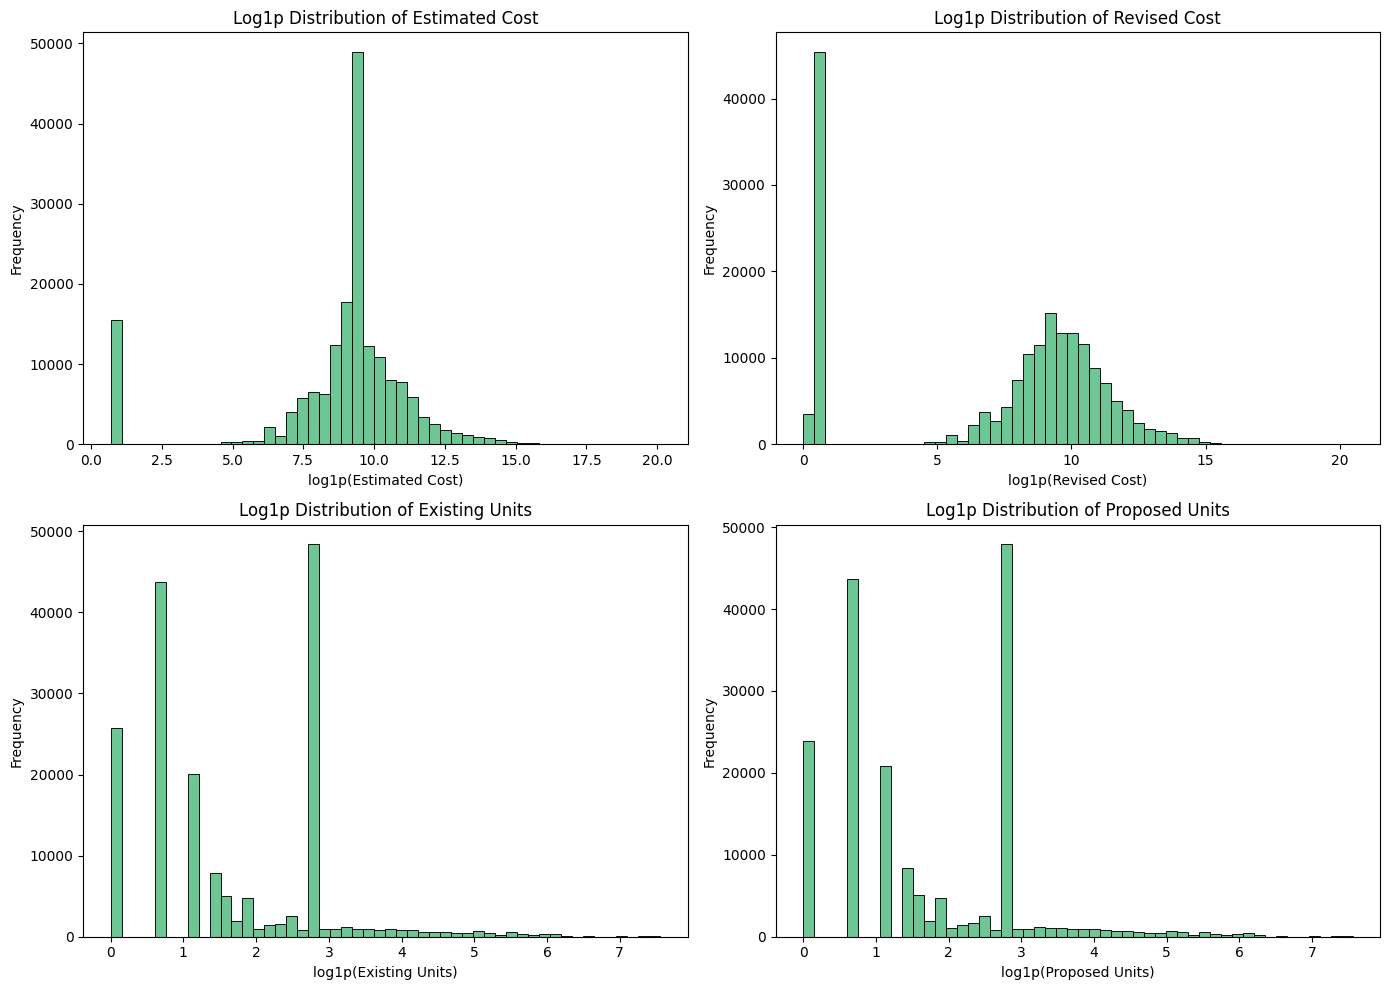

In [35]:
# Columns to transform
columns_to_log_plot = ['Estimated Cost', 'Revised Cost', 'Existing Units', 'Proposed Units']

# Remove problematic values (infinite, NaN)
sf_clean = sf[columns_to_log_plot].replace([np.inf, -np.inf], np.nan).dropna()

# Apply log1p safely
log_transformed_df = sf_clean.apply(np.log1p)

# Create 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Plot histograms without KDE
for i, col in enumerate(columns_to_log_plot):
    sns.histplot(log_transformed_df[col], bins=50, kde=False, ax=axes[i], color='mediumseagreen')
    axes[i].set_title(f'Log1p Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(f'log1p({col})')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2.1.3. Range:

**Keeping the raw initial data supports the best model performance because it provides more precise and informative input for learning. Including both the original values and their range versions can lead to multicollinearity—highly correlated features—which distorts the model’s estimates, makes coefficients unreliable, and reduces generalization. Dropping the range columns avoids this issue and helps the model stay focused on the most meaningful features.**

In [38]:
ranges= [
    'Estimated Cost Range',
    'Existing Stories Range',
    'Proposed Stories Range',
    'Existing Units Range',
    'Proposed Units Range']

In [39]:
sf_low_rise.drop(columns=ranges, inplace=True)
sf_low_rise

C:\Users\Benoit Loze\AppData\Local\Temp\ipykernel_39140\2120032926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_low_rise.drop(columns=ranges, inplace=True)


,Permit Number,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,...,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,...,1 family dwelling,16,2,3,5,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,...,1 family dwelling,16,2,3,5,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201611072166,8,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,...,1 family dwelling,1,2,5,5,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1443574295566
3,201611283529,6,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,...,1 family dwelling,16,2,3,5,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",144548169992
4,201706149344,8,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,...,apartments,326,2,1,1,10,Potrero Hill,94107,"(37.75922331346539, -122.39170402628598)",1466911170855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179618,201802232171,8,2018-02-23,6082,009,350,Paris,St,install 1300 sq ft vinyl siding to left side &...,issued,...,1 family dwelling,1,0,5,5,11,Excelsior,94112,"(37.72324934238285, -122.43409219261636)",1498336195616
179619,M893387,8,2018-02-23,1841,025D,1442,Funston,Av,street space,issued,...,1 family dwelling,16,2,5,5,7,Inner Sunset,94122,"(37.76117190796411, -122.47007880106999)",1498337116842
179620,M893407,8,2018-02-23,0018,004,2300,Stockton,St,street space & sidewalk repair,issued,...,1 family dwelling,16,2,5,5,3,North Beach,94133,"(37.80747140583783, -122.41024025753224)",1498338347099
179621,201802232172,8,2018-02-23,6021,001B,730,Excelsior,Av,to obtain final inspection for work approved u...,issued,...,1 family dwelling,1,0,5,5,11,Excelsior,94112,"(37.723206757170836, -122.42763728105176)",1498339194341


In [40]:
sf_target = pd.DataFrame(sf_low_rise["Permit Type"])
sf_target

,Permit Type
0,4
1,4
2,8
3,6
4,8
...,...
179618,8
179619,8
179620,8
179621,8


### 2.1.4. Partial duplicates:

**The dataset contains partial duplicates with the same Permit Number, likely due to extensions or modifications. Since your goal is to classify permits by type, and each entry has distinct feature values, these records provide useful variation for the model. Therefore, keeping them supports better learning and model performance.**

## 2.2. Inferential statistics:

The goal of inferential statistics is to test hypotheses about relationship or differences in the data.  
The target variable is "Permit Type".  
This step helps identify which features are stastically signicant.  

### 2.2.1. features preselection:

The following features can be dropped:  
    - 'Permit Number', 'Record ID' = unique identifiers.  
    - Location features: 'Location', 'Street Number', 'Street Name', 'Street Suffix', 'Block', 'Lot' = too specific.  
    - 'Description' = Free text.  
    - Dates: 'Permit Creation Date', 'Filed Date', 'Issued Date', 'First Construction Document Date', 'Permit Expiration Date', 'Current Status Date' = high collinearity.  
    - Consequence, not a predictor: "Current Status".  

In [47]:
to_be_dropped = [
    'Permit Number',
    'Record ID',
    'Location',
    'Street Number', 
    'Street Name', 
    'Street Suffix',
    'Block', 
    'Lot',
    'Description',
    'Permit Creation Date', 
    'Filed Date', 
    'Issued Date', 
    'First Construction Document Date', 
    'Permit Expiration Date', 
    'Current Status Date', 
    'Current Status']

In [48]:
sf_low_rise.drop(columns=to_be_dropped, inplace=True)
sf_low_rise.head(5)

C:\Users\Benoit Loze\AppData\Local\Temp\ipykernel_39140\4014640565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_low_rise.drop(columns=to_be_dropped, inplace=True)


,Permit Type,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,4,6,6,4000.0,4000.0,tourist hotel/motel,143,1 family dwelling,16,2,3,5,3,Tenderloin,94102
1,4,7,6,1.0,500.0,tourist hotel/motel,15,1 family dwelling,16,2,3,5,3,Tenderloin,94102
2,8,2,2,2000.0,2000.0,1 family dwelling,1,1 family dwelling,1,2,5,5,3,Nob Hill,94109
3,6,3,6,100000.0,100000.0,retail sales,15,1 family dwelling,16,2,3,5,6,Tenderloin,94102
4,8,5,5,4000.0,4000.0,apartments,326,apartments,326,2,1,1,10,Potrero Hill,94107


In [49]:
sf_low_rise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164689 entries, 0 to 179622
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Permit Type                          164689 non-null  int64  
 1   Number of Existing Stories           164689 non-null  Int64  
 2   Number of Proposed Stories           164689 non-null  Int64  
 3   Estimated Cost                       164689 non-null  float64
 4   Revised Cost                         164689 non-null  float64
 5   Existing Use                         164689 non-null  object 
 6   Existing Units                       164689 non-null  Int64  
 7   Proposed Use                         164689 non-null  object 
 8   Proposed Units                       164689 non-null  Int64  
 9   Plansets                             164689 non-null  Int64  
 10  Existing Construction Type           164689 non-null  Int64  
 11  Proposed Construct

### 2.2.2. Features statistical check:

The significance of each feature variable—whether categorical or numerical—has been evaluated with respect to the "Permit Type" target variable using appropriate statistical tests. A p-value threshold of 0.05 has been applied to determine statistical significance.  

In [52]:
def chi2_significance(df, cat_col, target_col, alpha=0.05):
    contingency = pd.crosstab(df[cat_col], df[target_col])
    if contingency.shape[0] < 2 or contingency.shape[1] < 2:
        return None  # Not enough categories to test
    chi2, p, dof, expected = chi2_contingency(contingency)
    significant = p < alpha
    return {"Feature": cat_col, "P-value": p, "Significant": significant}

# Run chi-squared test for all object (categorical) features
results = []
for col in sf_low_rise.select_dtypes(include='object').columns:
    if col != 'Permit Type':
        res = chi2_significance(sf_low_rise, col, 'Permit Type')
        if res is not None:
            results.append(res)

# Convert to DataFrame
results_df1 = pd.DataFrame(results)
results_df1

,Feature,P-value,Significant
0,Existing Use,0.0,True
1,Proposed Use,0.0,True
2,Neighborhoods - Analysis Boundaries,0.0,True


**Proposed Use likely reflects why the permit is being applied for, and is more directly tied to the permit type.**

In [54]:
selected_features_text = list(results_df1.loc[results_df1["Significant"] == True, "Feature"])
selected_features_text.remove("Existing Use")
selected_features_text

['Proposed Use', 'Neighborhoods - Analysis Boundaries']

In [55]:
def pearson_pval_summary(df, target_col, alpha=0.05):
    results = []

    for col in df.select_dtypes(include=['number']).columns:
        if col != target_col:
            coef, pval = pearsonr(df[col], df[target_col])
            significant = pval < alpha
            results.append((col, coef, pval, significant))

    results_df = pd.DataFrame(results, columns=['Feature', 'Correlation Coefficient', 'P-value', 'Significant'])
    return results_df.sort_values('P-value')

In [56]:
results_df2 = pearson_pval_summary(sf_low_rise, "Permit Type")
results_df2

,Feature,Correlation Coefficient,P-value,Significant
2,Estimated Cost,-0.115450,0.000000e+00,True
3,Revised Cost,-0.110987,0.000000e+00,True
7,Existing Construction Type,0.076470,4.723566e-212,True
9,Supervisor District,-0.039900,5.154751e-59,True
5,Proposed Units,-0.033400,7.089423e-42,True
0,Number of Existing Stories,0.031435,2.741645e-37,True
8,Proposed Construction Type,0.030553,2.559824e-35,True
4,Existing Units,-0.017515,1.173569e-12,True
6,Plansets,-0.008178,9.033417e-04,True
1,Number of Proposed Stories,0.001645,5.044627e-01,False


In [57]:
selected_features_num = list(results_df2.loc[results_df2["Significant"] == True, "Feature"])
selected_features_num

['Estimated Cost',
 'Revised Cost',
 'Existing Construction Type',
 'Supervisor District',
 'Proposed Units',
 'Number of Existing Stories',
 'Proposed Construction Type',
 'Existing Units',
 'Plansets']

# 3. Explore data relationships:

## 3.1. Multicolinearity among features:

Correlation calculation only works with numerical values.

In [61]:
sf_low_rise_corr = sf_low_rise[selected_features_num]
sf_low_rise_corr.head(5)

,Estimated Cost,Revised Cost,Existing Construction Type,Supervisor District,Proposed Units,Number of Existing Stories,Proposed Construction Type,Existing Units,Plansets
0,4000.0,4000.0,3,3,16,6,5,143,2
1,1.0,500.0,3,3,16,7,5,15,2
2,2000.0,2000.0,5,3,1,2,5,1,2
3,100000.0,100000.0,3,6,16,3,5,15,2
4,4000.0,4000.0,1,10,326,5,1,326,2


In [62]:
corr_matrix = sf_low_rise_corr.corr()
corr_matrix

,Estimated Cost,Revised Cost,Existing Construction Type,Supervisor District,Proposed Units,Number of Existing Stories,Proposed Construction Type,Existing Units,Plansets
Estimated Cost,1.000000,0.963186,-0.014622,0.011082,0.059412,0.019314,-0.056217,0.009134,0.001127
Revised Cost,0.963186,1.000000,-0.012767,0.010038,0.054237,0.017730,-0.052631,0.008619,0.001062
Existing Construction Type,-0.014622,-0.012767,1.000000,0.049441,-0.230371,-0.384710,0.936756,-0.251824,-0.006659
Supervisor District,0.011082,0.010038,0.049441,1.000000,-0.049490,-0.165774,0.041898,-0.057744,0.001240
Proposed Units,0.059412,0.054237,-0.230371,-0.049490,1.000000,0.322291,-0.273324,0.912349,0.003562
Number of Existing Stories,0.019314,0.017730,-0.384710,-0.165774,0.322291,1.000000,-0.390218,0.331127,0.015528
Proposed Construction Type,-0.056217,-0.052631,0.936756,0.041898,-0.273324,-0.390218,1.000000,-0.247352,-0.006457
Existing Units,0.009134,0.008619,-0.251824,-0.057744,0.912349,0.331127,-0.247352,1.000000,0.003064
Plansets,0.001127,0.001062,-0.006659,0.001240,0.003562,0.015528,-0.006457,0.003064,1.000000


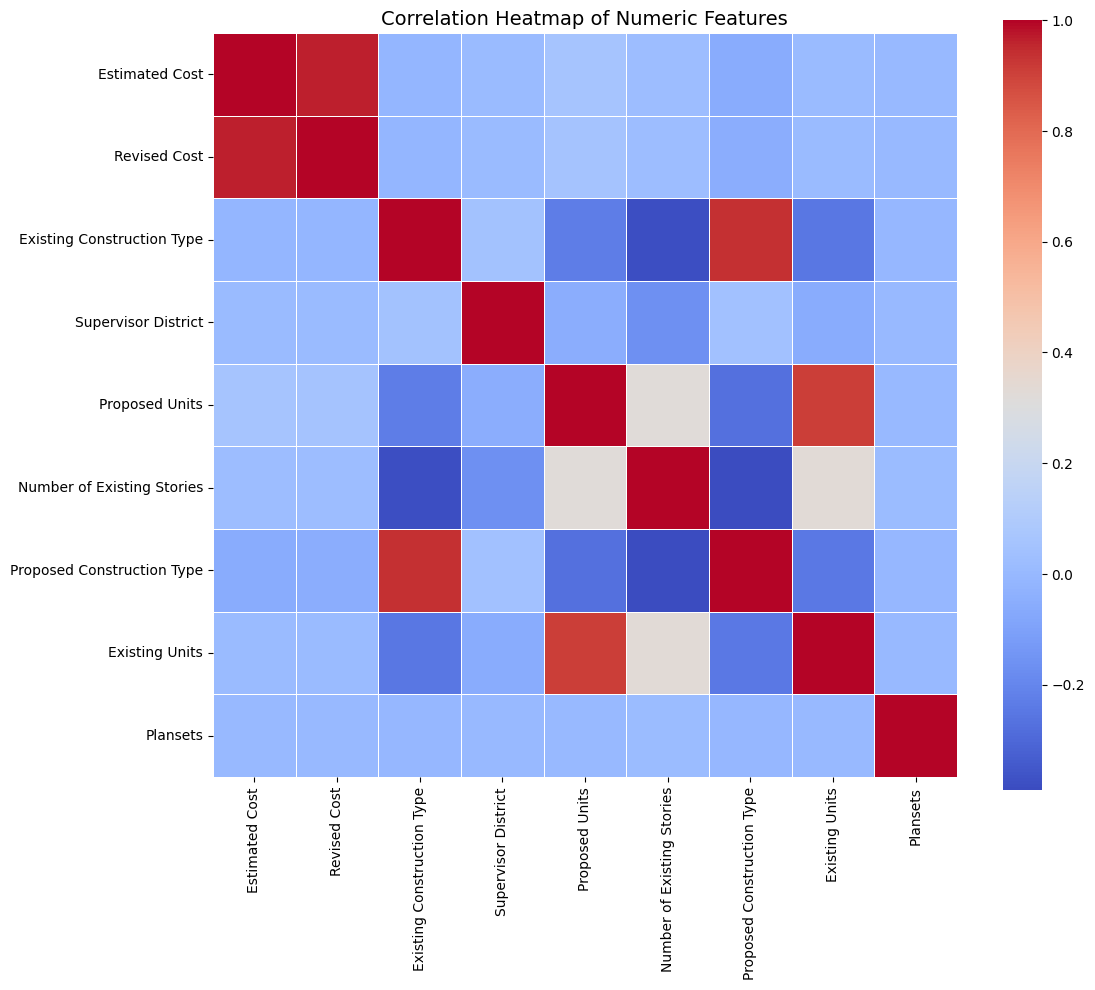

In [63]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

**The pairplot can take some time due to the lenght of the dataset.**  
**Please feel free to skip it by commenting it.**  

In [65]:
# sns.pairplot(sf_low_rise_corr)
# plt.show()

The final purpose will be to use Logistic Regression to identify the Permit Type.  
Logistic regression assumes independence among predictors.  
High correlation between features (multicollinearity) distorts the coefficient estimates and inflates stadard errors.  
This is better to drop one of the correlated features.  
The usual threshold is 0.80.  

Are concerned:  
    - "Revised Cost" vs "Estimated Cost".  
    - "Proposed construction Type" vs "Existing Construction Type".  
    - "Proposed Units" vs "Existing Units".  

In [67]:
for n in ["Revised Cost", "Existing Construction Type", "Existing Units"]:
    selected_features_num.remove(n)
selected_features_num

['Estimated Cost',
 'Supervisor District',
 'Proposed Units',
 'Number of Existing Stories',
 'Proposed Construction Type',
 'Plansets']

In [68]:
selected_features = selected_features_text + selected_features_num
selected_features

['Proposed Use',
 'Neighborhoods - Analysis Boundaries',
 'Estimated Cost',
 'Supervisor District',
 'Proposed Units',
 'Number of Existing Stories',
 'Proposed Construction Type',
 'Plansets']

In [69]:
sf_low_rise = sf_low_rise[selected_features]
sf_low_rise.head(5)

,Proposed Use,Neighborhoods - Analysis Boundaries,Estimated Cost,Supervisor District,Proposed Units,Number of Existing Stories,Proposed Construction Type,Plansets
0,1 family dwelling,Tenderloin,4000.0,3,16,6,5,2
1,1 family dwelling,Tenderloin,1.0,3,16,7,5,2
2,1 family dwelling,Nob Hill,2000.0,3,1,2,5,2
3,1 family dwelling,Tenderloin,100000.0,6,16,3,5,2
4,apartments,Potrero Hill,4000.0,10,326,5,1,2


## 3.2. Features data distribution:

Before starting plotting feature distribution, let us make sure to adopt the right plot for each feature:  
    - Numerical continuous features = histogram = "Estimated Cost", "Proposed Units".  
    - Numerical Categorical features = bar plot or count plot = "Supervisor District", "Number of Existing Stories", "Proposed Construction Type", "Plansets".  
    - Text categorical features = bar plot or count plot = "Proposed Use", "Neighborhoods - Analysis Boundaries".                                                      

In [72]:
cols_to_convert = [
    "Supervisor District", 
    "Number of Existing Stories", 
    "Proposed Construction Type", 
    "Plansets", 
    "Proposed Use", 
    "Neighborhoods - Analysis Boundaries"]

sf_low_rise[cols_to_convert] = sf_low_rise[cols_to_convert].astype('category')

C:\Users\Benoit Loze\AppData\Local\Temp\ipykernel_39140\597438440.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_low_rise[cols_to_convert] = sf_low_rise[cols_to_convert].astype('category')


In [73]:
sf_low_rise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164689 entries, 0 to 179622
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Proposed Use                         164689 non-null  category
 1   Neighborhoods - Analysis Boundaries  164689 non-null  category
 2   Estimated Cost                       164689 non-null  float64 
 3   Supervisor District                  164689 non-null  category
 4   Proposed Units                       164689 non-null  Int64   
 5   Number of Existing Stories           164689 non-null  category
 6   Proposed Construction Type           164689 non-null  category
 7   Plansets                             164689 non-null  category
dtypes: Int64(1), category(6), float64(1)
memory usage: 4.9 MB


In [74]:
sf_low_rise[cols_to_convert]

,Supervisor District,Number of Existing Stories,Proposed Construction Type,Plansets,Proposed Use,Neighborhoods - Analysis Boundaries
0,3,6,5,2,1 family dwelling,Tenderloin
1,3,7,5,2,1 family dwelling,Tenderloin
2,3,2,5,2,1 family dwelling,Nob Hill
3,6,3,5,2,1 family dwelling,Tenderloin
4,10,5,1,2,apartments,Potrero Hill
...,...,...,...,...,...,...
179618,11,2,5,0,1 family dwelling,Excelsior
179619,7,6,5,2,1 family dwelling,Inner Sunset
179620,3,6,5,2,1 family dwelling,North Beach
179621,11,2,5,0,1 family dwelling,Excelsior


In [75]:
for col in sf_low_rise.select_dtypes(include=["category"]).columns:
    print(f"\nValue counts for '{col}':")
    print(sf_low_rise[col].value_counts())


Value counts for 'Proposed Use':
Proposed Use
1 family dwelling       81982
apartments              35298
2 family dwelling       20187
office                  10480
retail sales             4159
                        ...  
roofing materials           1
not applicable              1
meat/produce marts          1
orphanage                   1
dairies/dairy equip.        1
Name: count, Length: 94, dtype: int64

Value counts for 'Neighborhoods - Analysis Boundaries':
Neighborhoods - Analysis Boundaries
Mission                           13251
Sunset/Parkside                    9515
Financial District/South Beach     8386
West of Twin Peaks                 8246
Castro/Upper Market                7879
Marina                             7614
Noe Valley                         7325
Pacific Heights                    7258
Outer Richmond                     7237
South of Market                    6263
Bernal Heights                     5607
Inner Sunset                       5389
Haight Ashbu

### 3.2.1. Histograms:

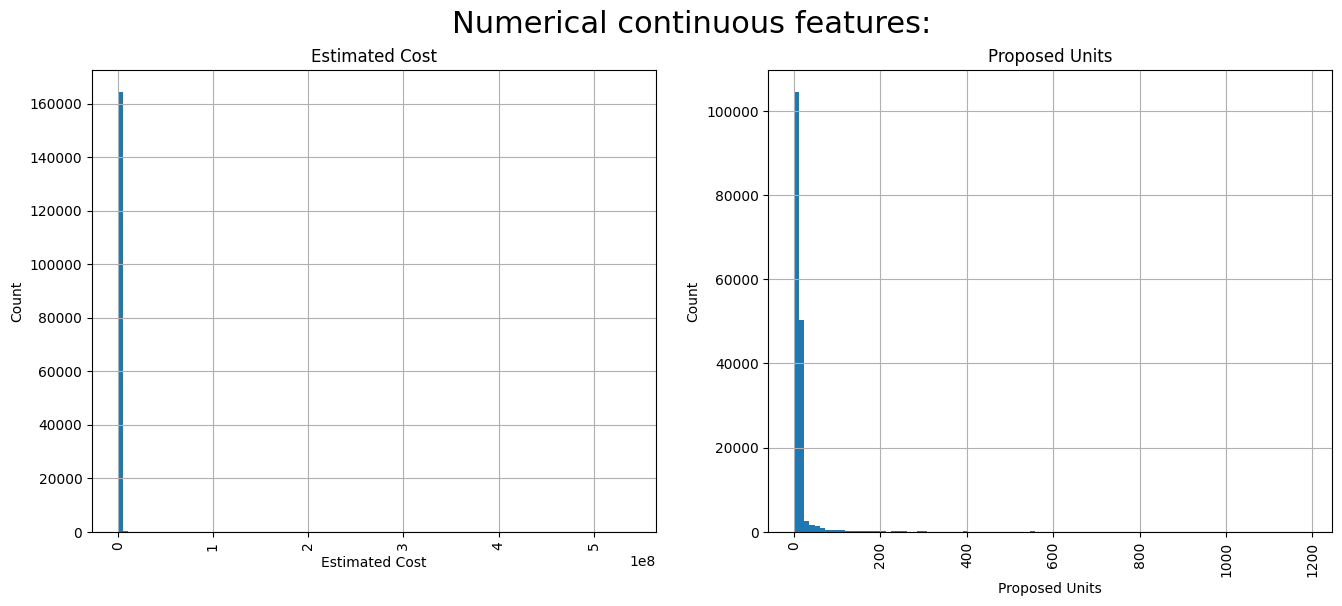

In [77]:
num_continuous = ["Estimated Cost", "Proposed Units"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle(f"Numerical continuous features:", fontsize=22)

for i, col in enumerate(num_continuous):
    sf_low_rise[col].hist(ax=axes[i], bins=100)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

In [78]:
# # Check if 'Estimated Cost' is float64
# if sf_low_rise['Estimated Cost'].dtype == np.float64:
#     print("'Estimated Cost' is float64")
# else:
#     print(f"'Estimated Cost' is {sf_low_rise['Estimated Cost'].dtype}")

# # Check if 'Proposed Units' is int64
# if sf_low_rise['Proposed Units'].dtype == np.int64:
#     print("'Proposed Units' is int64")
# else:
#     print(f"'Proposed Units' is {sf_low_rise['Proposed Units'].dtype}")

In [79]:
for col in num_continuous :
    data = pd.to_numeric(sf_low_rise[col], errors='coerce').dropna()
    print(f"\nStatistics for {col}:")
    print(f"Mean: {data.mean():,.2f}")
    print(f"Median: {data.median():,.2f}")
    print(f"Standard Deviation: {data.std():,.2f}")


Statistics for Estimated Cost:
Mean: 78,699.84
Median: 10,400.00
Standard Deviation: 1,951,837.46

Statistics for Proposed Units:
Mean: 10.85
Median: 3.00
Standard Deviation: 26.17


**Estimated cost:**  
    - The mean is much higher than the median, confirming strong positive skew.  
    - The standard deviation is massive compared to the mean, showing high variability.  
    - Severe outliers and non-normal distribution.  

**Proposed Units:**   
    - Mean is higher than median, hence skewness.
    - Standard deviation is larger that the mean, hence high variability.  

**We meet the problem already discussed earlier and above, the presence of outliers.**  
**As explained and as a reminder, these outliers will be handled while using np.log1p().**  

### 3.2.1. Count plot:

C:\Users\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


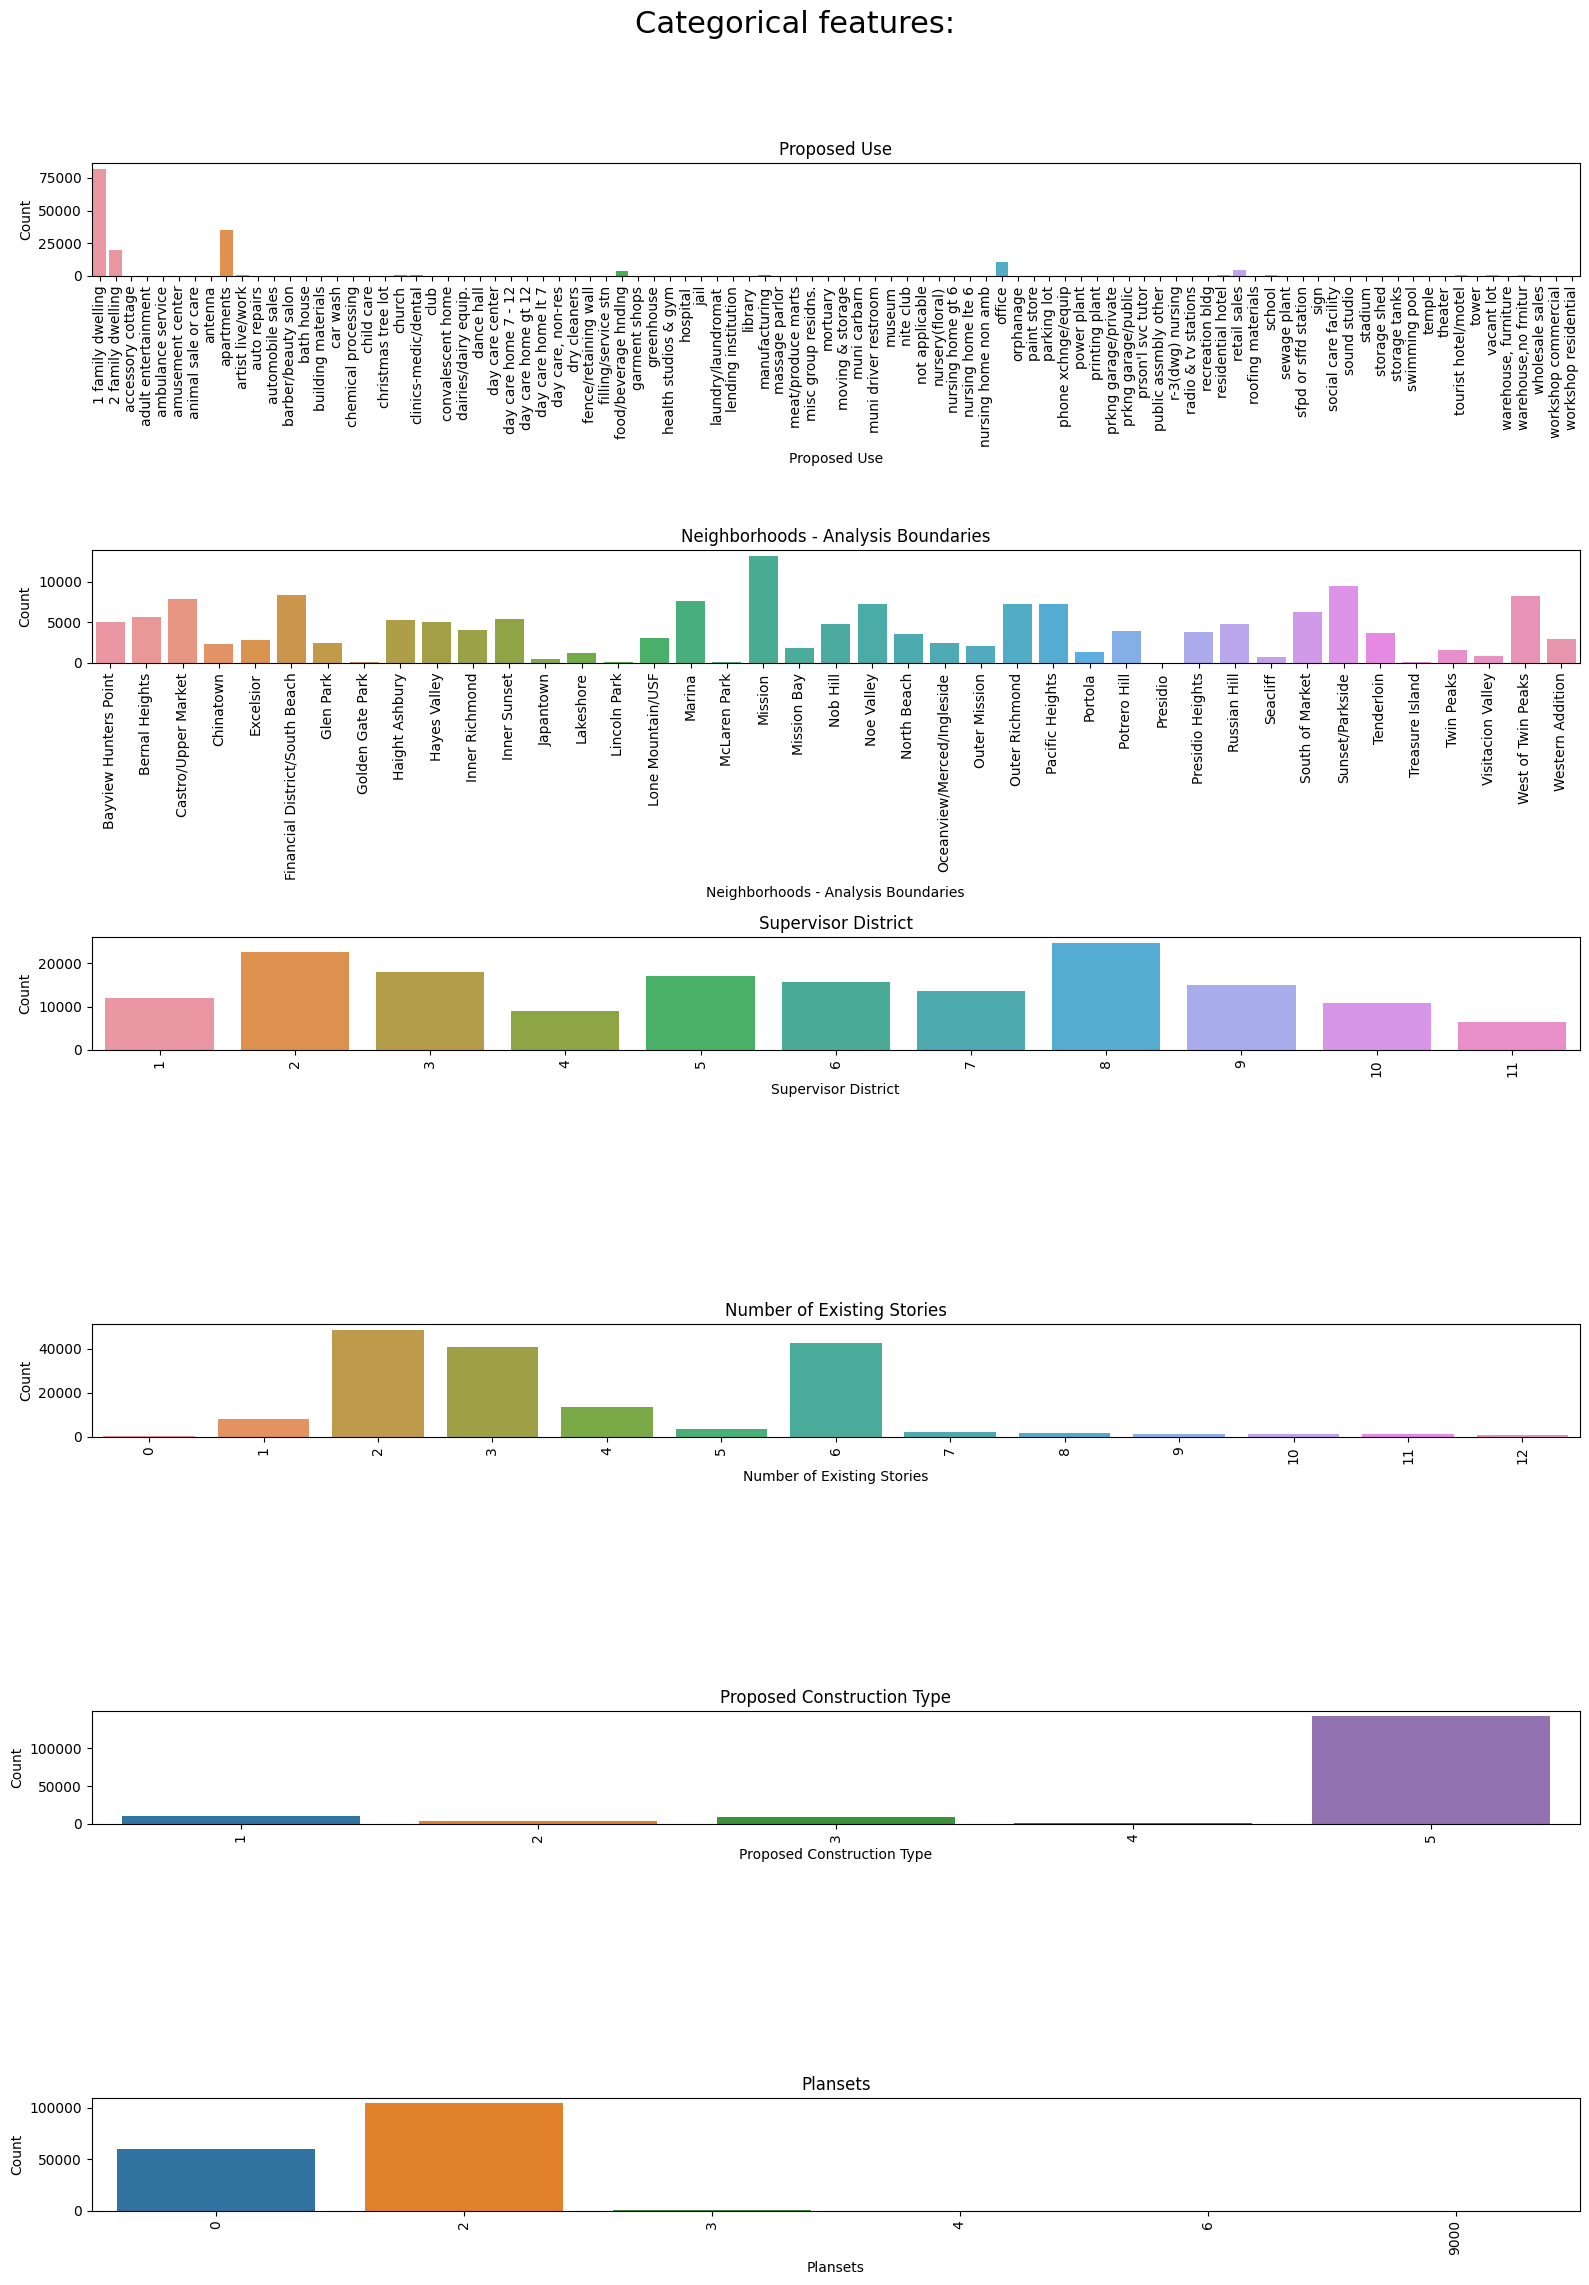

In [83]:
categorical = [ 
    "Proposed Use", 
    "Neighborhoods - Analysis Boundaries", 
    "Supervisor District", 
    "Number of Existing Stories", 
    "Proposed Construction Type", "Plansets"]

fig, axes = plt.subplots(6, 1, figsize=(16, 24))
axes = axes.flatten()
plt.suptitle(f"Categorical features:", fontsize=22)

for i, col in enumerate(categorical):
    sns.countplot(data=sf_low_rise, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=0.5)  # Increase vertical space between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Prevent title overlap
plt.show()

# 4. Feature selection and engineering:

**Feature selection** has been progressively conducted throughout the notebook based on statistical significance, correlation analysis, and domain relevance.  

Missing data issues have been addressed during the **Data Wrangling** phase using appropriate handling strategies (e.g., imputation or removal).  

**One-hot encoding still** needs to be applied to the **categorical features** to convert them into a machine-readable numerical format suitable for model training.  

In [86]:
file1 = r"..\data\processed\sf_target02.csv"
file2 = r"..\data\processed\sf_predictors02.csv"

In [87]:
# sf_target.to_csv(file1, index=False)
# sf_low_rise.to_csv(file2, index=False)

## 4.1. One-hot encoding of ctegorical features:

In [89]:
sf_low_rise = pd.get_dummies(sf_low_rise, columns=categorical, drop_first=True)

In [90]:
print(sf_low_rise.shape)
print(sf_low_rise.columns)

(164689, 166)
Index(['Estimated Cost', 'Proposed Units', 'Proposed Use_2 family dwelling',
       'Proposed Use_accessory cottage', 'Proposed Use_adult entertainment',
       'Proposed Use_ambulance service', 'Proposed Use_amusement center',
       'Proposed Use_animal sale or care', 'Proposed Use_antenna',
       'Proposed Use_apartments',
       ...
       'Number of Existing Stories_12', 'Proposed Construction Type_2',
       'Proposed Construction Type_3', 'Proposed Construction Type_4',
       'Proposed Construction Type_5', 'Plansets_2', 'Plansets_3',
       'Plansets_4', 'Plansets_6', 'Plansets_9000'],
      dtype='object', length=166)


In [91]:
sf_low_rise.head(5)

,Estimated Cost,Proposed Units,Proposed Use_2 family dwelling,Proposed Use_accessory cottage,Proposed Use_adult entertainment,Proposed Use_ambulance service,Proposed Use_amusement center,Proposed Use_animal sale or care,Proposed Use_antenna,Proposed Use_apartments,...,Number of Existing Stories_12,Proposed Construction Type_2,Proposed Construction Type_3,Proposed Construction Type_4,Proposed Construction Type_5,Plansets_2,Plansets_3,Plansets_4,Plansets_6,Plansets_9000
0,4000.0,16,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,1.0,16,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,2000.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
3,100000.0,16,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,4000.0,326,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [92]:
categorical2 = list(sf_low_rise.columns)
#categorical2

In [93]:
sf_low_rise = sf_low_rise.astype({col: int for col in sf_low_rise.select_dtypes(include='bool').columns})

In [94]:
for col in sf_low_rise.columns:
    if col not in num_continuous and sf_low_rise[col].nunique() == 2:
        print(f"{col}: {sf_low_rise[col].unique()}")

Proposed Use_2 family dwelling: [0 1]
Proposed Use_accessory cottage: [0 1]
Proposed Use_adult entertainment: [0 1]
Proposed Use_ambulance service: [0 1]
Proposed Use_amusement center: [0 1]
Proposed Use_animal sale or care: [0 1]
Proposed Use_antenna: [0 1]
Proposed Use_apartments: [0 1]
Proposed Use_artist live/work: [0 1]
Proposed Use_auto repairs: [0 1]
Proposed Use_automobile sales: [0 1]
Proposed Use_barber/beauty salon: [0 1]
Proposed Use_bath house: [0 1]
Proposed Use_building materials: [0 1]
Proposed Use_car wash: [0 1]
Proposed Use_chemical processing: [0 1]
Proposed Use_child care: [0 1]
Proposed Use_christmas tree lot: [0 1]
Proposed Use_church: [0 1]
Proposed Use_clinics-medic/dental: [0 1]
Proposed Use_club: [0 1]
Proposed Use_convalescent home: [0 1]
Proposed Use_dairies/dairy equip.: [0 1]
Proposed Use_dance hall: [0 1]
Proposed Use_day care center: [0 1]
Proposed Use_day care home 7 - 12: [0 1]
Proposed Use_day care home gt 12: [0 1]
Proposed Use_day care home lt 7: [

In [95]:
sf_low_rise.head(5)

,Estimated Cost,Proposed Units,Proposed Use_2 family dwelling,Proposed Use_accessory cottage,Proposed Use_adult entertainment,Proposed Use_ambulance service,Proposed Use_amusement center,Proposed Use_animal sale or care,Proposed Use_antenna,Proposed Use_apartments,...,Number of Existing Stories_12,Proposed Construction Type_2,Proposed Construction Type_3,Proposed Construction Type_4,Proposed Construction Type_5,Plansets_2,Plansets_3,Plansets_4,Plansets_6,Plansets_9000
0,4000.0,16,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1.0,16,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,100000.0,16,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,4000.0,326,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [96]:
sf_low_rise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164689 entries, 0 to 179622
Columns: 166 entries, Estimated Cost to Plansets_9000
dtypes: Int64(1), float64(1), int32(164)
memory usage: 107.0 MB


In [97]:
sf_predictors = sf_low_rise
#sf_predictors.head(5)

In [98]:
print(f"sf_target shape: {sf_target.shape}")
print(f"sf_predictors shape: {sf_predictors.shape}")

sf_target shape: (164689, 1)
sf_predictors shape: (164689, 166)


# 5. Save data:

In [100]:
file1 = r"..\data\processed\sf_target.csv"
file2 = r"..\data\processed\sf_predictors.csv"

In [101]:
# sf_target.to_csv(file1, index=False)
# sf_predictors.to_csv(file2, index=False)